Importing numpy and pandas

In [334]:
import numpy as np
import pandas as pd

Importing more utilites

In [335]:
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 : Loading training and test data



*   Variables to hold paths of training features, training labels, and test features respectively



In [336]:
f_tr_feat = './training_features.csv'
f_tr_lab = './training_labels.csv'
f_te_feat = './testing_features.csv'



*   Reading files as Dataframes



In [337]:
train_feats = pd.read_csv(f_tr_feat, parse_dates=True)
train_labels = pd.read_csv(f_tr_lab)
test_feats = pd.read_csv(f_te_feat, parse_dates=True)

Let us examine the dataframes to make sure they have been read properly.

In [338]:
# train_feats.head()

In [339]:
train_feats.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [340]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [341]:
# test_feats.head()

In [342]:
test_feats.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In summary, there are

In [343]:
print(f"{train_feats.shape[0]} training data")
print(f"{train_feats.shape[1]} original features")
print(f"{test_feats.shape[0]} test data")

59400 training data
40 original features
14850 test data


# Part 2 : Analyzing Data

First, let us see how many waterpoints are there in each category in the training set. 

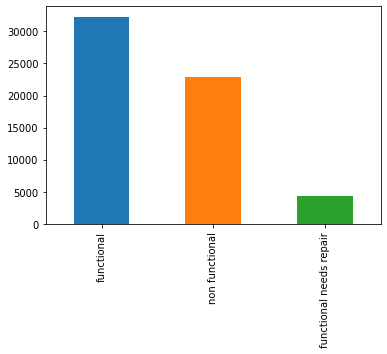

In [344]:
colors = sns.color_palette()[:3]
train_labels.status_group.value_counts().plot.bar(color=colors)

Seems like the most of them are 'functional'. Least are 'functional needs repair'.

Now let us analyze about the features in the dataset in more detail. As you know, the dataset is about waterpoints in Tanzania.

Following are the feature column names:

In [345]:
train_feats.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

Now let us see what are the data types of these feature columns.

In [346]:
train_feats.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

It seems like many features are categorical as their data type is ```object```.

# Part 3: Data Preprocessing

Let us check in which columns are there missing values. Note that missing values can be null, and in some cases 0 might represent missing data as well. Before starting off, we shall combine the train and test feature sets to a single dataframe for preprocessing purposes.

In [347]:
comb_feats = train_feats.append(test_feats)
comb_feats.shape

(74250, 40)

First let us consider null values. Following are the columns which have null values.

In [348]:
cols_with_null = comb_feats.columns[comb_feats.isna().any()].tolist()
cols_with_null

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [349]:
comb_feats[cols_with_null].describe()

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
count,69746,69718,73780,70095,69404,38992,70457
unique,2140,2410,21425,2,12,2868,2
top,Government Of Tanzania,DWE,Shuleni,True,VWC,K,True
freq,11299,21751,646,63749,45917,858,48606


Since all the above columns are categorical, a better approach I think is to impute missing values with the most frequent value in the corresponding column.

In [350]:
valuesToFill = {}
for col in cols_with_null:
  mostFreqVal = comb_feats[col].mode()[0]
  valuesToFill[col] = mostFreqVal

comb_feats = comb_feats.fillna(value=valuesToFill)

Now let us check how the dataset looks like after imputing null values.

In [351]:
comb_feats[cols_with_null].describe()

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
count,74250,74250,74250,74250,74250,74250,74250
unique,2140,2410,21425,2,12,2868,2
top,Government Of Tanzania,DWE,Shuleni,True,VWC,K,True
freq,15803,26283,1116,67904,50763,36116,52399


Since `public_meeting` and `permit` are supposed to be `bool` fields, let us make sure now they are so.

In [352]:
comb_feats[['public_meeting', 'permit']].dtypes

public_meeting    bool
permit            bool
dtype: object

Now let us consider about numerical columns whose values being 0 can represent missing values. First, following are the numerical columns.

In [353]:
num_cols = comb_feats.select_dtypes(include=['int64', 'float64']).columns
comb_feats[num_cols].dtypes

id                     int64
amount_tsh           float64
gps_height             int64
longitude            float64
latitude             float64
num_private            int64
region_code            int64
district_code          int64
population             int64
construction_year      int64
dtype: object

In [354]:
comb_feats[num_cols].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


First, since the column `num_private` gives no significant information, and the Problem Description page does not specify what that is either, let us drop that column.

In [355]:
if 'num_private' in comb_feats.columns:
  comb_feats = comb_feats.drop(columns=['num_private'])
num_cols = comb_feats.select_dtypes(include=['int64', 'float64']).columns
'num_private' in comb_feats.columns

False

We can see that the `construction_year` has 0 as minimum value. It is wrong. Let us impute those values with the actual earliest year in the values of `construction_year`.

In [356]:
years = comb_feats.construction_year.unique()
years.sort()
earliest = years[1]

# Impute 0 with earliest in construction_year values
comb_feats.loc[comb_feats.construction_year <= 0, comb_feats.columns == 'construction_year'] = earliest

comb_feats.construction_year.unique().min()

1960

The 0 values in `amount_tsh` and `gps_height` could mean valid information. Even though `district_code` has values of 0, we do not impute them with anything because those are 'codes'. And, although `population` has 0 values, we can see that 25% of values of `population` are 0; hence 0 values should not be incorrect. Therefore, we shall leave these columns untouched.

So, we are left to deal with `longitude` and `latitude`. According to GPS coordinates of Tanzania, although latitudes can be below 0, longitudes should be at least over 30. Therefore, any value below that must be incorrect, together with the corresponding latitude value. Let find such records and impute wrong values with the mean of each column, *aggregated by* `region_code`.

In [357]:
wrong_longitudes = comb_feats[comb_feats['longitude'] < 30]
# First make longitude and latitude values in above records with NaN
wrong_longitudes.loc[:, comb_feats.columns == 'longitude'] = np.nan
wrong_longitudes.loc[:, comb_feats.columns == 'latitude'] = np.nan
# Replace in original set
comb_feats[comb_feats['longitude'] < 30] = wrong_longitudes

comb_feats["longitude"] = comb_feats.groupby("region_code").transform(lambda x: x.fillna(x.mean())).longitude
comb_feats["latitude"] = comb_feats.groupby("region_code").transform(lambda x: x.fillna(x.mean())).latitude

comb_feats[num_cols].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,35.100069,-5.786177,15.265414,5.629077,180.750828,1983.975300
std,21434.273081,2906.762364,692.761033,2.568408,2.812485,17.508907,9.641636,471.086120,20.243943
min,0.000000,0.000000,-90.000000,30.000646,-11.649440,1.000000,0.000000,0.000000,1960.000000
25%,18562.250000,0.000000,0.000000,33.234470,-8.526075,5.000000,2.000000,0.000000,1960.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.022635,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.358985,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-0.998464,99.000000,80.000000,30500.000000,2013.000000


# Part 4: Feature Engineering

Now that we have all missing values in our dataset properly treated, it is time to consider Feature Engineering.

Since there are `construction_year` and `date_recorded` as features, we can create a new feature called `age` to represent how old is the waterpoint.

In [358]:
if 'age' not in comb_feats.columns:
  comb_feats['age'] = comb_feats.date_recorded.apply(pd.to_datetime) - comb_feats.construction_year.apply(lambda x: pd.to_datetime(x, format='%Y'))

# Divide the age by number of nanoseconds per year, to normalize
nanoSecondsPerYear = 365.25*24*60*60*1e9
comb_feats['age'] = comb_feats.age.apply(lambda t: t.delta/nanoSecondsPerYear)

comb_feats.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,age
count,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,35.100069,-5.786177,15.265414,5.629077,180.750828,1983.975300,28.263407
std,21434.273081,2906.762364,692.761033,2.568408,2.812485,17.508907,9.641636,471.086120,20.243943,20.073683
min,0.000000,0.000000,-90.000000,30.000646,-11.649440,1.000000,0.000000,0.000000,1960.000000,-6.584531
25%,18562.250000,0.000000,0.000000,33.234470,-8.526075,5.000000,2.000000,0.000000,1960.000000,8.145791
50%,37124.500000,0.000000,364.000000,34.907475,-5.022635,12.000000,3.000000,25.000000,1986.000000,26.190281
75%,55686.750000,20.000000,1317.000000,37.181685,-3.358985,17.000000,5.000000,215.000000,2004.000000,51.518138
max,74249.000000,350000.000000,2777.000000,40.345193,-0.998464,99.000000,80.000000,30500.000000,2013.000000,53.921971


It is surprising to see that there are records whose `age` is less than 0 - which should mean that they were recorded even before they were constructed! Let us see how many such records are there.

In [359]:
comb_feats[comb_feats['age'] < 0][['construction_year', 'date_recorded', 'age']].head()

,construction_year,date_recorded,age
8729,2008,2004-05-01,-3.668720
10441,2006,2004-12-01,-1.084189
13366,2011,2004-06-01,-6.584531
23373,2009,2004-03-01,-4.837782
27501,2009,2004-01-07,-4.985626


Since there are only 5 out of 74250 records, the impact is really small. Therefore, as a remedy, let us modify the `date_recorded` in the above records to the latest value in `date_recorded` in the dataset. Then we must again apply making of `age` values.

In [360]:
dates = comb_feats['date_recorded'].unique()
dates.sort()
latest = dates[-1]
latest

comb_feats.loc[comb_feats['age'] < 0, ['date_recorded']] = latest

comb_feats['age'] = comb_feats.date_recorded.apply(pd.to_datetime) - comb_feats.construction_year.apply(lambda x: pd.to_datetime(x, format='%Y'))

# Divide the age by number of nanoseconds per year, to normalize
nanoSecondsPerYear = 365.25*24*60*60*1e9
comb_feats['age'] = comb_feats.age.apply(lambda t: t.delta/nanoSecondsPerYear)

comb_feats.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,age
count,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,35.100069,-5.786177,15.265414,5.629077,180.750828,1983.975300,28.264956
std,21434.273081,2906.762364,692.761033,2.568408,2.812485,17.508907,9.641636,471.086120,20.243943,20.071583
min,0.000000,0.000000,-90.000000,30.000646,-11.649440,1.000000,0.000000,0.000000,1960.000000,0.005476
25%,18562.250000,0.000000,0.000000,33.234470,-8.526075,5.000000,2.000000,0.000000,1960.000000,8.147844
50%,37124.500000,0.000000,364.000000,34.907475,-5.022635,12.000000,3.000000,25.000000,1986.000000,26.190281
75%,55686.750000,20.000000,1317.000000,37.181685,-3.358985,17.000000,5.000000,215.000000,2004.000000,51.518138
max,74249.000000,350000.000000,2777.000000,40.345193,-0.998464,99.000000,80.000000,30500.000000,2013.000000,53.921971


As two other features, let as have `year_recorded` and `month_recorded` as separate features, created using `date_recorded`. 

In [361]:
comb_feats['year_recorded'] = pd.to_datetime(comb_feats.date_recorded).dt.year
comb_feats['month_recorded'] = pd.to_datetime(comb_feats.date_recorded).dt.month

comb_feats.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,year_recorded,month_recorded
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,12.197125,2011,3
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,K,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3.175907,2013,3
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4.150582,2013,2
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,K,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,27.074606,2013,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,K,True,1960,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,51.529090,2011,7


Now that we have created useful new features, let us remove unnecessary features. We shall remove the columns `id`, `date_recorded`, and `recorded_by` as they are not directly relevant for predictions.

In [362]:
cols_to_remove = ['date_recorded', 'recorded_by']
for col in cols_to_remove:
  if col in comb_feats.columns:
    comb_feats = comb_feats.drop(columns=[col])

As the last step of feature engineering, let us encode the categorical features using Label Encoding.

In [363]:
# Using LabelEncoder class
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Categorical columns
cat_cols = comb_feats.select_dtypes(include=['object', 'bool']).columns.tolist()

for col in cat_cols:
  comb_feats[col] = encoder.fit_transform(comb_feats[col])

comb_feats.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,year_recorded,month_recorded
0,69572,6000.0,1548,1390,1706,34.938093,-9.856322,45683,1,13116,3,11,5,51,1429,109,1,7,2388,0,1999,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1,12.197125,2011,3
1,8776,0.0,522,1399,610,34.698766,-2.147466,45426,4,17596,9,20,2,103,1581,280,1,2,644,1,2010,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1,3.175907,2013,3
2,34310,25.0,924,686,2296,37.460664,-3.821329,17767,5,10096,8,21,4,108,1629,250,1,7,2261,1,2009,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1,4.150582,2013,2
3,67743,0.0,1961,263,2078,38.486161,-11.155298,45537,7,9998,12,90,63,87,1576,58,1,7,644,1,1986,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1,27.074606,2013,1
4,19728,0.0,20,0,133,31.130847,-1.825359,43411,4,8583,4,18,1,26,1692,0,1,7,644,1,1960,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1,51.529090,2011,7


Well now... we have completed preprocessing and feature engineering. Let us divide the combined set back to train and test sets as we had initially.

In [364]:
train_feats = comb_feats[:len(train_feats)]
test_feats = comb_feats[len(train_feats):]

train_feats.shape, test_feats.shape

((59400, 40), (14850, 40))

In [365]:
train_feats.dtypes

id                         int64
amount_tsh               float64
funder                     int64
gps_height                 int64
installer                  int64
longitude                float64
latitude                 float64
wpt_name                   int64
basin                      int64
subvillage                 int64
region                     int64
region_code                int64
district_code              int64
lga                        int64
ward                       int64
population                 int64
public_meeting             int64
scheme_management          int64
scheme_name                int64
permit                     int64
construction_year          int64
extraction_type            int64
extraction_type_group      int64
extraction_type_class      int64
management                 int64
management_group           int64
payment                    int64
payment_type               int64
water_quality              int64
quality_group              int64
quantity  

# Part 5: Validation

Before making actual predictions, let us do a validation by splitting our training data into two parts: training and validation. As our learning model, we are going to use a Random Forest model.

First, let us decide which features are we going to use in model training.

In [367]:
to_exclude = ['id']
features = [f for f in train_feats.columns if f not in to_exclude]
len(features)

39

First let us split the training set

In [368]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(train_feats[features], train_labels.status_group, test_size=0.2, random_state=1)

train_X.shape, valid_X.shape

((47520, 39), (11880, 39))

Initializing and fitting the model

In [369]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, min_samples_split=10)

model.fit(train_X[features], train_y)

score = model.score(valid_X[features], valid_y)

print(score)

0.817003367003367


81% is a good achievement from the training set. Now we are more confident about our model.
So let us go ahead and fit the model using the whole training set, and finally make predictions!

# Finally: Fitting the model and making predictions

In [371]:
# Fitting
fit_X = train_feats[features]
fit_y = train_labels.status_group

model.fit(fit_X, fit_y)

print("Model Fitting - Complete")

# Making predictions
predict_X = test_feats[features]

preds = model.predict(predict_X)

print("Making Predictions - Complete")

test_preds = test_feats.copy()
test_preds['status_group'] = preds

test_preds.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,year_recorded,month_recorded,status_group
0,50785,0.0,345,1996,426,35.290799,-4.059696,2669,0,9934,8,21,3,63,18,321,1,3,644,1,2012,9,6,3,3,2,0,2,6,2,3,3,5,3,1,6,5,1.095140,2013,2,non functional
1,51630,0.0,507,1569,442,36.656709,-3.309214,7473,5,6897,0,2,2,0,693,300,1,7,2570,1,2000,3,1,0,7,4,0,2,6,2,2,2,8,6,0,1,1,13.095140,2013,2,functional
2,17168,0.0,507,1567,442,34.767863,-5.004344,41112,0,13539,18,13,2,109,1792,500,1,7,2312,1,2010,9,6,3,7,4,0,2,6,2,2,2,5,3,1,6,5,3.085558,2013,2,functional
3,45559,0.0,443,267,545,38.058046,-9.418672,24064,7,7143,7,80,43,49,1283,250,1,7,644,1,1987,9,6,3,7,4,6,6,6,2,0,0,7,5,0,6,5,26.058864,2013,1,non functional
4,49871,500.0,150,1260,164,35.006123,-10.950412,24521,7,9033,16,10,3,61,1157,60,1,10,157,1,2000,3,1,0,9,4,3,1,6,2,1,1,8,6,0,1,1,13.234771,2013,3,functional


Yay! Now we have made the predictions! Let us write the output to a csv file and submit to the competition, and see our achievement.

In [374]:
version = "2-0"

out_cols = ['id', 'status_group']
test_preds[out_cols].to_csv(f"./submission-{version}.csv", index=False)